### CA - 04 Ensemble Models

In [47]:
#import nessesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
%matplotlib inline

In [48]:
df = pd.read_csv('https://github.com/ArinB/MSBA-CA-03-Decision-Trees/blob/master/census_data.csv?raw=true')

### Part 1: Data Understanding / Exporation

In [49]:
#print first 5 rows of the dataframe
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [50]:
#print the shape of the dataframe
df.shape

(48842, 11)

# display descriptive statistics of each column

C:\Users\henry\AppData\Local\Temp\ipykernel_2248\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\henry\AppData\Local\Temp\ipykernel_2248\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C:\Users\henry\AppData\Local\Temp\ipykernel_2248\3266578157.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
C

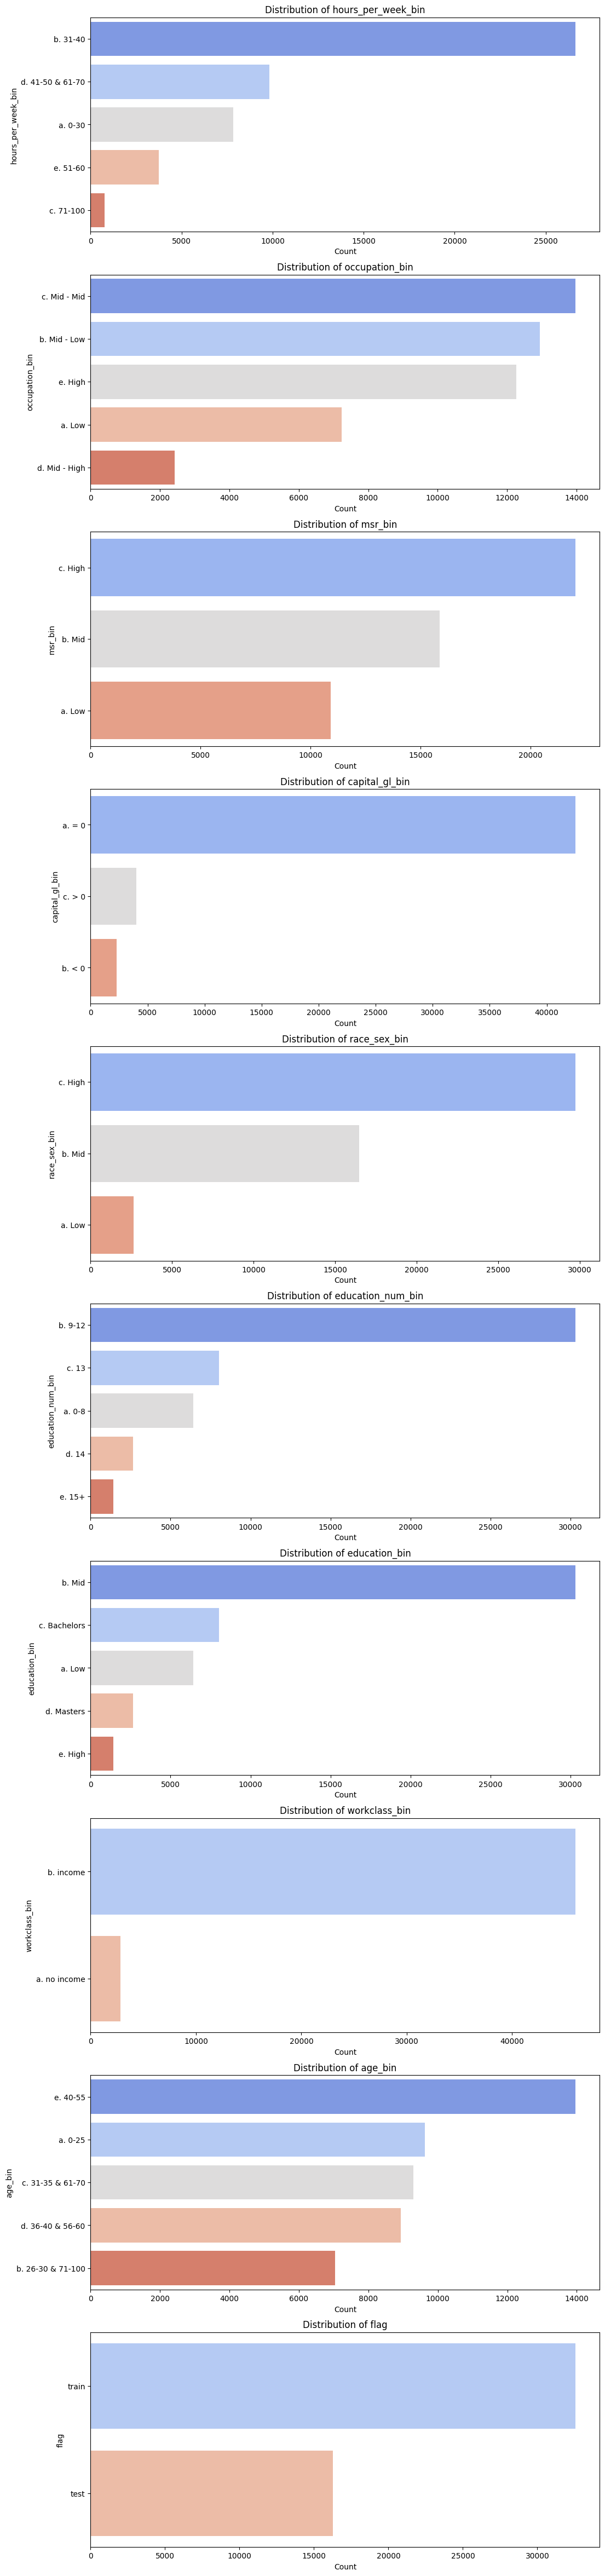

In [51]:

# Select categorical (binned) columns
cat_cols = df.select_dtypes(exclude=['number']).columns

# Set up the figure size
plt.figure(figsize=(12, 6 * len(cat_cols)))

# Loop through categorical columns and create count plots
for i, col in enumerate(cat_cols, 1):
    plt.subplot(len(cat_cols), 1, i)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette="coolwarm")
    plt.title(f"Distribution of {col}")
    plt.xlabel("Count")
    plt.ylabel(col)
    

plt.show()

### 2. Data Quality Analysis

Auto viz is commented out because on my system running it caused issues with matplotlib. 
The report generated from autoviz showed no data quality issues.
Uncommenting the code will allow for view of the data quality report, but if matplotlib issues are not just my system, recomment out code to view graphs later in code.

In [52]:
#from autoviz import AutoViz_Class
#AV = AutoViz_Class()

In [53]:
#df_AV = AV.AutoViz(df)

In [54]:
# Check for missing values
print(df.isnull().sum())

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64


### 2. Finding Optimal Value of a key Ensemble Method Hyperparameter

In [55]:
# Identify categorical columns excluding "flag"
categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols = categorical_cols[categorical_cols != "flag"]  # Exclude "flag"

# Perform one-hot encoding on the selected categorical columns
if len(categorical_cols) > 0:
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


In [56]:
# Example: Assuming 'flag' column contains 'train' or 'test' labels
train_df = df[df["flag"] == "train"]
test_df = df[df["flag"] == "test"]

# If you need to extract features (X) and target (y)
X_train = train_df.drop(columns=["y", "flag"])  # Exclude target and split indicator
y_train = train_df["y"]

X_test = test_df.drop(columns=["y", "flag"])
y_test = test_df["y"]


<Axes: >

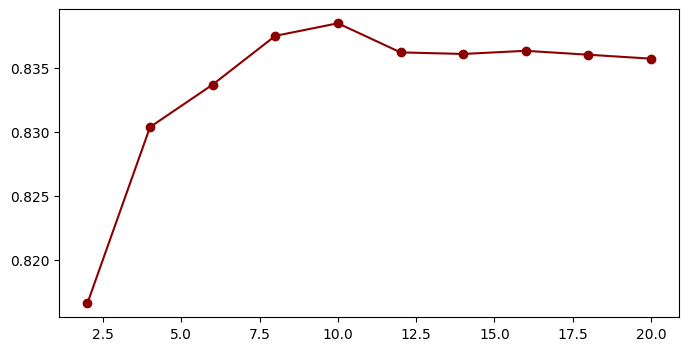

In [57]:
results = []
max_depth_options = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
for trees in max_depth_options:
    model = DecisionTreeClassifier(max_depth=trees, random_state=101)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((accuracy))

plt.figure(figsize=(8,4))
pd.Series(results, max_depth_options).plot(color='darkred', marker='o')

### Building a Random Forest Model

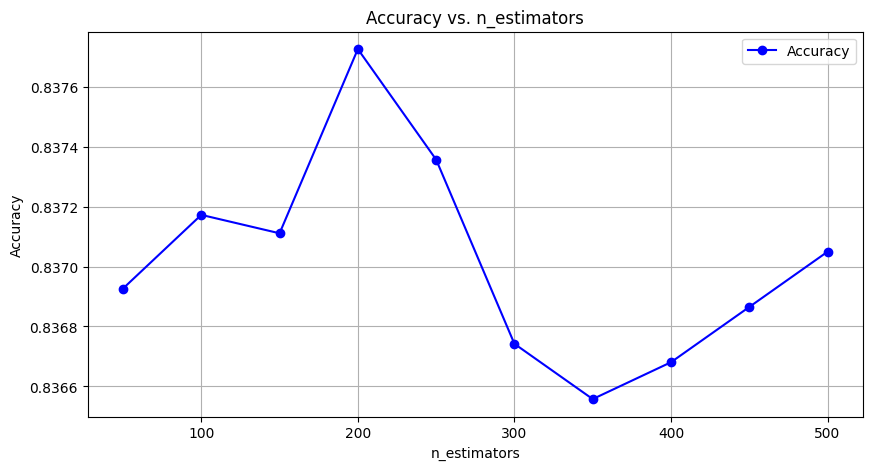

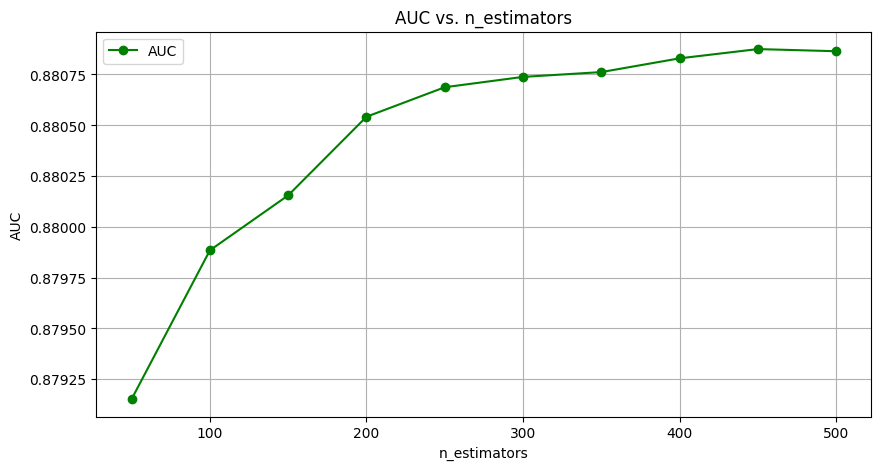

In [58]:
# Initialize variables
results_accuracy_rf = []
results_auc_rf = []
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Loop through n_estimators options
for n_estimators in n_estimators_options:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=31)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Append results
    results_accuracy_rf.append(accuracy)
    results_auc_rf.append(auc)

# Plot Accuracy vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_accuracy_rf, color='blue', marker='o', label='Accuracy')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot AUC vs. n_estimators
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_auc_rf, color='green', marker='o', label='AUC')
plt.title('AUC vs. n_estimators')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()

1. Write your observations about the Classifier’s behavior with respect to the number
of estimators
For AUC increasing the number of estimators increases the models AUC score but accuracy increases until 200 estimators. After 200 accuracy score takes a big dip before it begins increasing slightly again.
2. Is there an optimal value of the estimator within the given range?
taking into account both scores, the best amount of estimators is 200 since accuaracy takes a huge hit at that point and AUC does not increase past 200 enough to make up for the drop.


### 4. Building AdaBoost, Gradient Boost, and XGB

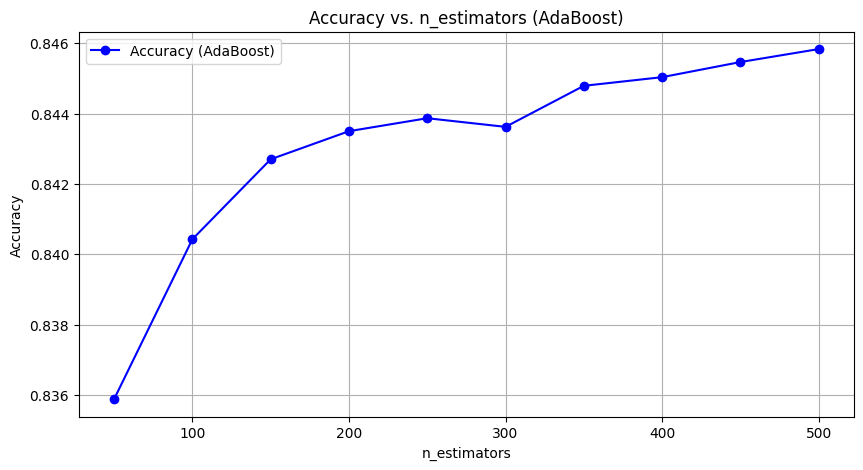

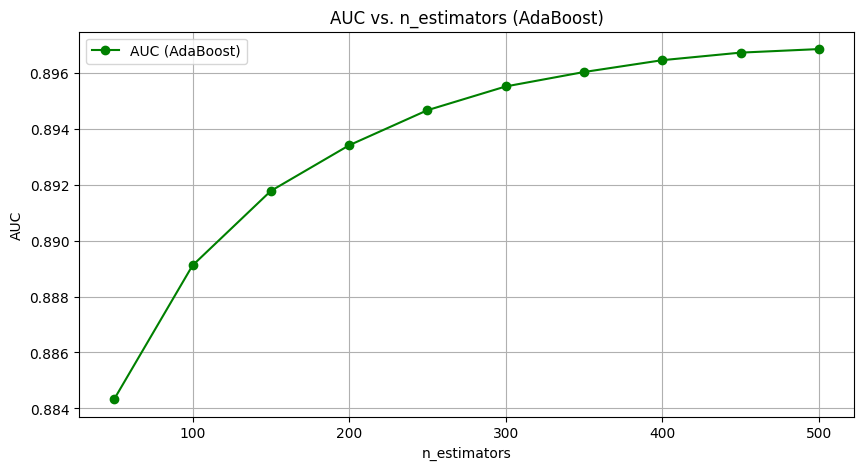

In [59]:
from sklearn.ensemble import AdaBoostClassifier

results_accuracy_ada = []
results_auc_ada = []

# Loop through n_estimators options
for n_estimators in n_estimators_options:
    model = AdaBoostClassifier(n_estimators=n_estimators, random_state=31)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Append results
    results_accuracy_ada.append(accuracy)
    results_auc_ada.append(auc)

# Plot Accuracy vs. n_estimators for AdaBoost
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_accuracy_ada, color='blue', marker='o', label='Accuracy (AdaBoost)')
plt.title('Accuracy vs. n_estimators (AdaBoost)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot AUC vs. n_estimators for AdaBoost
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_auc_ada, color='green', marker='o', label='AUC (AdaBoost)')
plt.title('AUC vs. n_estimators (AdaBoost)')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()


1. Write your observations about the Classifier’s behavior with respect to the number
of estimators
This model continues to increase in predictive power as more estimators are used. Given this the only worry with adding estimators seems to be overfitting
2. Is there an optimal value of the estimator within the given range?
Within the given range the optimal value is 500 estimators.

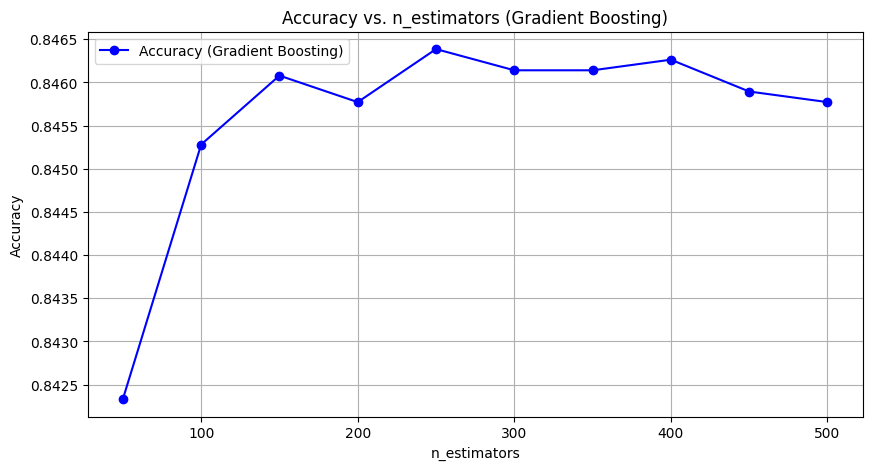

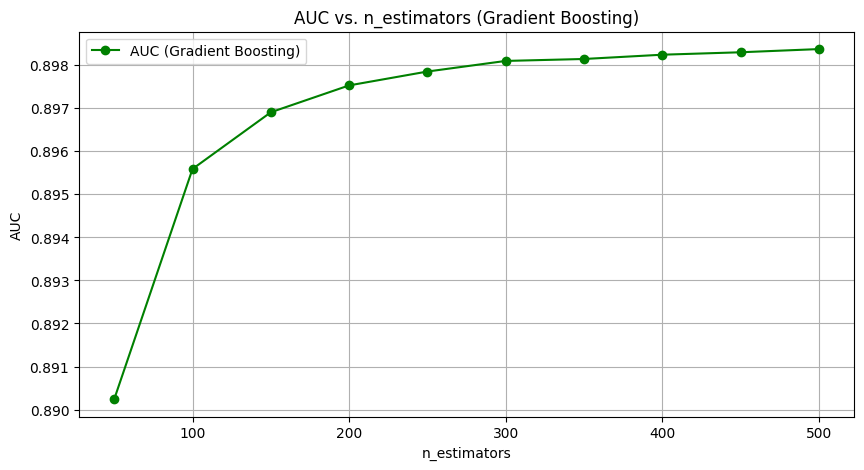

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

results_accuracy_gb = []
results_auc_gb = []

# Loop through n_estimators options
for n_estimators in n_estimators_options:
    model = GradientBoostingClassifier(n_estimators=n_estimators, random_state=31)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Append results
    results_accuracy_gb.append(accuracy)
    results_auc_gb.append(auc)

# Plot Accuracy vs. n_estimators for Gradient Boosting
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_accuracy_gb, color='blue', marker='o', label='Accuracy (Gradient Boosting)')
plt.title('Accuracy vs. n_estimators (Gradient Boosting)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot AUC vs. n_estimators for Gradient Boosting
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_auc_gb, color='green', marker='o', label='AUC (Gradient Boosting)')
plt.title('AUC vs. n_estimators (Gradient Boosting)')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()


1. Write your observations about the Classifier’s behavior with respect to the number
of estimators
Auc increases as the number of estimators increases but accuracy peaks around 250 estimators then starts to drop off.
2. Is there an optimal value of the estimator within the given range?
The optimal value for the given range is either around 250 estimators or around 400 estimators. Both values of estimators are giving about the same average of AUC + Accuracy. Just that AUC is lower at 250 estimators and Accuracy is lower at 400 estimators.

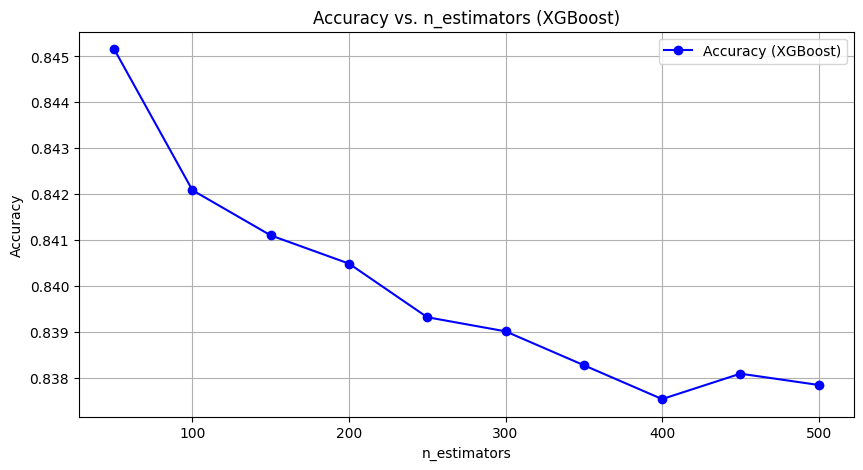

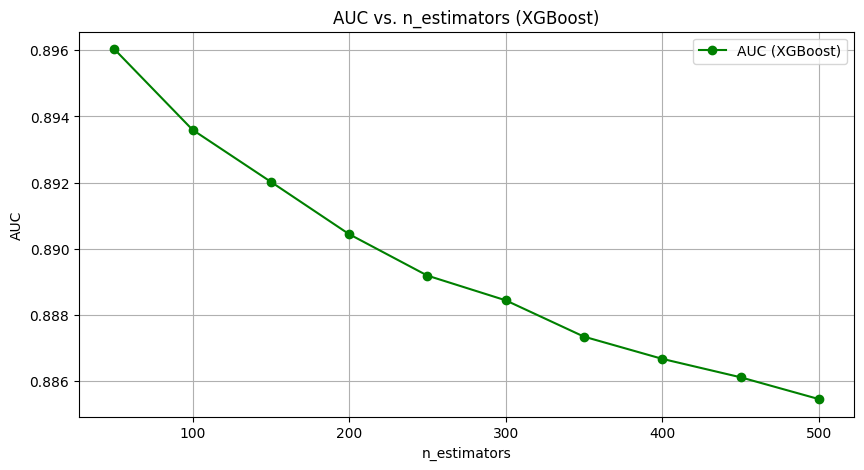

In [61]:
from xgboost import XGBClassifier

results_accuracy_xgb = []
results_auc_xgb = []

X_train.columns = X_train.columns.str.replace(r'[\[\]<]', '', regex=True)
X_test.columns = X_test.columns.str.replace(r'[\[\]<]', '', regex=True)

# Loop through n_estimators options
for n_estimators in n_estimators_options:
    model = XGBClassifier(n_estimators=n_estimators, random_state=31, use_label_encoder=False, eval_metric='logloss')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    # Append results
    results_accuracy_xgb.append(accuracy)
    results_auc_xgb.append(auc)

# Plot Accuracy vs. n_estimators for XGBoost
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_accuracy_xgb, color='blue', marker='o', label='Accuracy (XGBoost)')
plt.title('Accuracy vs. n_estimators (XGBoost)')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

# Plot AUC vs. n_estimators for XGBoost
plt.figure(figsize=(10, 5))
plt.plot(n_estimators_options, results_auc_xgb, color='green', marker='o', label='AUC (XGBoost)')
plt.title('AUC vs. n_estimators (XGBoost)')
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.grid(True)
plt.legend()
plt.show()


1. Write your observations about the Classifier’s behavior with respect to the number
of estimators
for this model adding more estimators lowers the models preformance going up from 50. Accuracy has a sharp drop down and AUC has a almost linear drop.
2. Is there an optimal value of the estimator within the given range?
Giving the range, the optimal estimator value is 50.

### 5.Compare Performance

In [63]:
import pandas as pd

# Assuming you already have these lists populated from your previous runs
model_names = ["Random Forest", "AdaBoost", "Gradient Boosting", "XGBoost"]
n_estimators_options = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=["Model", "n_estimators", "Accuracy", "AUC"])

# Helper function to add rows to the DataFrame
def add_results(model_name, accuracy_list, auc_list):
    for i, n_estimators in enumerate(n_estimators_options):
        results_df.loc[len(results_df)] = [model_name, n_estimators, accuracy_list[i], auc_list[i]]

# Add results for each model
add_results("Random Forest", results_accuracy_rf, results_auc_rf)
add_results("AdaBoost", results_accuracy_ada, results_auc_ada)
add_results("Gradient Boosting", results_accuracy_gb, results_auc_gb)
add_results("XGBoost", results_accuracy_xgb, results_auc_xgb)

# Find the best combination of accuracy and AUC for each model
best_results = results_df.loc[results_df.groupby("Model")[["Accuracy", "AUC"]].idxmax().max(axis=1)]

# Select only the best Accuracy and AUC columns and drop the n_estimators column
best_results = best_results[["Model", "Accuracy", "AUC"]]

# Transpose the DataFrame for better readability
print(best_results.T)


                19                 29             8         30
Model     AdaBoost  Gradient Boosting  Random Forest   XGBoost
Accuracy  0.845833           0.845771       0.836865  0.845157
AUC       0.896852           0.898369       0.880875  0.896032
